<a href="https://colab.research.google.com/github/Evans-Sense/pet/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-20182021")

print("Path to dataset files:", path)

100%|██████████| 111M/111M [00:03<00:00, 35.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3


In [3]:
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv


In [4]:
db = pd.read_csv('/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv')

db.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [5]:
db.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
db.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000
mean,4422029.023,54.038,53.244,4307.141,1.949,6.215,11.399,1.726,53.918,10.628,3.945
std,21507519.155,4.623,20.748,3308.050,1.039,4.957,6.536,1.082,33.353,9.792,4.558
min,-2144967296.000,41.459,19.890,3.000,0.000,1.000,1.000,-2.000,0.070,0.010,1.000
25%,1950000.000,53.378,37.778,2661.000,1.000,2.000,5.000,1.000,38.000,7.000,1.000
50%,2990000.000,55.171,43.068,2922.000,2.000,5.000,10.000,2.000,48.020,9.700,1.000
75%,4802000.000,56.226,65.649,6171.000,3.000,9.000,16.000,2.000,63.130,12.700,11.000
max,2147483647.000,71.980,162.536,61888.000,5.000,39.000,39.000,10.000,7856.000,9999.000,11.000


In [7]:
db.shape

(5477006, 13)

#1. EDA


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'geo_lat'}>,
        <Axes: title={'center': 'geo_lon'}>],
       [<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'building_type'}>,
        <Axes: title={'center': 'level'}>],
       [<Axes: title={'center': 'levels'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'object_type'}>, <Axes: >]], dtype=object)

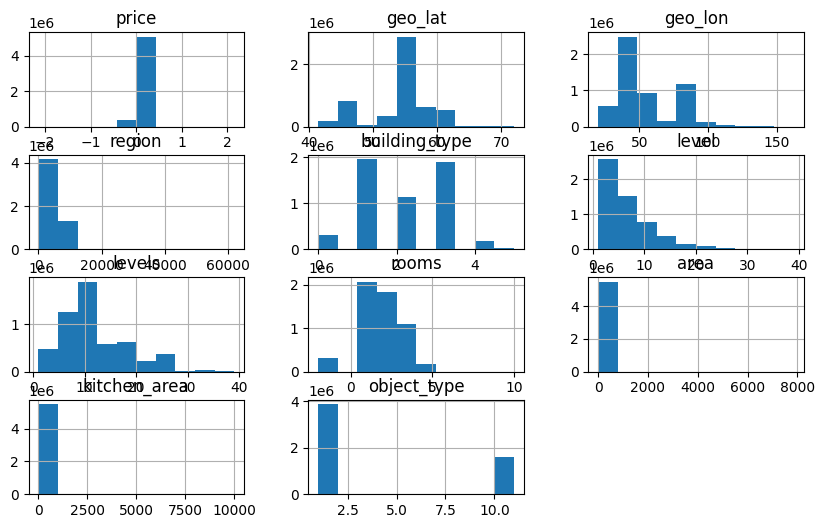

In [9]:
db.hist(figsize=(10, 6))

In [10]:
db.isna().sum()

,0
price,0
date,0
time,0
geo_lat,0
geo_lon,0
region,0
building_type,0
level,0
levels,0
rooms,0


In [11]:
db.duplicated().sum()

np.int64(1523)

In [12]:
db = db.drop_duplicates()
db.shape

(5475483, 13)

In [13]:
db.drop('time', axis=1, inplace=True)
db.object_type = db.object_type.apply(lambda x: 2 if x == 11 else x)
db.rooms = db.rooms.apply(lambda x : 0 if x < 0 else x)
db.price = db.price.abs()

In [14]:
db.loc[db.level > db.levels, 'level'] = db.levels
db['level_to_levels'] = db.level / db.levels

db.drop('level', axis=1, inplace=True)
db.drop("levels", axis=1, inplace=True)

In [15]:
db.date = pd.to_datetime(db.date)
db['year'] = db['date'].dt.year
db['month'] = db['date'].dt.month
db.drop('date', axis=1, inplace=True)

In [16]:
db.head()

,price,geo_lat,geo_lon,region,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month
0,6050000,59.806,30.376,2661,1,3,82.600,10.800,1,0.800,2018,2
1,8650000,55.684,37.297,81,3,2,69.100,12.000,1,0.208,2018,2
2,4000000,56.295,44.062,2871,1,3,66.000,10.000,1,0.556,2018,2
3,1850000,44.996,39.075,2843,4,2,38.000,5.000,2,0.750,2018,3
4,5450000,55.919,37.985,81,3,2,60.000,10.000,1,0.929,2018,3


In [17]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область',
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область',
    '4417': 'Республика Коми',
    '5282': 'Челябинская область',
    '5368': 'Иркутская область',
    '5520': 'Пермский край',
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

In [18]:
db['region'] = db.region.astype(str)
db['region_name'] = db['region'].map(region_name)
db.drop('region', axis=1, inplace=True)
db.head()

,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,region_name
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,Санкт-Петербург
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,Московская область
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,Нижегородская область
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,Краснодарский край
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,Московская область


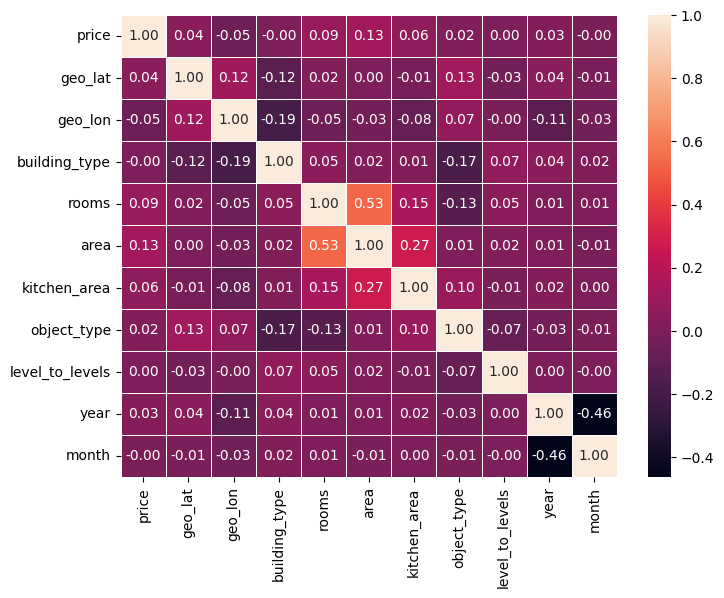

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(db.corr(numeric_only=True), annot=True, cbar=True, linewidths=.5, fmt= '.2f')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
db['enc_reg'] = encoder.fit_transform(db[['region_name']])
db.drop('region_name', axis=1, inplace=True)
db.head()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,enc_reg
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,62
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,30
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,33
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,22
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,30


In [21]:
from sklearn.model_selection import train_test_split
X = db.drop('price', axis=1)
Y = db['price']
feature_names = X.columns
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4380386, 11), (1095097, 11), (4380386,), (1095097,))

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Переходим к обучению моделей

Обучим CatBoostRegressor без подбора гиперпараметров

In [ ]:
!pip install catboost
from sklearn.metrics import *
from catboost import CatBoostRegressor, Pool
import numpy as np

CBModel = CatBoostRegressor(iterations=1000, verbose=100)
CBModel.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)])

y_test_pred = CBModel.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

evals_result = CBModel.get_evals_result()
train_loss = evals_result['learn']['RMSE']
test_loss = evals_result['validation']['RMSE']

Визуализируем процесс обучения

In [ ]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

Посмотрим на важность признаков для модели

In [ ]:
feature_importance = CBModel.get_feature_importance()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели CatBoost')
plt.grid(axis='x')
plt.show()

Аналогично проверим LightGBM

In [30]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import lightgbm as lgb

evals_result = {}
LGBMReg = LGBMRegressor(n_estimators=1000)
LGBMReg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric='rmse',
            callbacks=[lgb.record_evaluation(evals_result)])

y_test_pred = LGBMReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

train_loss = evals_result['training']['rmse']
test_loss = evals_result['valid_1']['rmse']

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.151668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 4380386, number of used features: 11
[LightGBM] [Info] Start training from score 4655931.455416


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 140844780920881.72
Mean Absolute Error (MAE): 1048772.368111387
Relative MAE (% от среднего y_test): 22.589256708803852 %


In [ ]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

In [ ]:
feature_importance = LGBMReg.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели CatBoost')
plt.grid(axis='x')
plt.show()

XGBoost

In [ ]:
import xgboost as xgb

evals_result = {}

# Create DMatrix objects for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse' # Evaluation metric
}

XGBReg = xgb.train(params, dtrain,
                   num_boost_round=1000,
                   evals=[(dtrain, 'training'), (dtest, 'validation')],
                   evals_result=evals_result,
                   verbose_eval=100)

y_test_pred = XGBReg.predict(dtest)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

train_loss = evals_result['training']['rmse']
test_loss = evals_result['validation']['rmse']

In [ ]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

In [ ]:
feature_importance = XGBReg.get_score(importance_type='weight')

feature_importance_list = list(feature_importance.items())
importance_scores = [item[1] for item in feature_importance_list]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели XGBoost')
plt.grid(axis='x')
plt.show()

#Подбор гиперпараметров

**Для начала сделаем функцию, которая будет разбивать датасет на батчи для кросс-валидации**

In [23]:
from sklearn.model_selection import KFold


def cross_validate_model(model, X_train, y_train, n_splits=5):
    """
    Performs cross-validation on a given model.

    Args:
        model: The machine learning model to cross-validate.
        X_train: Training features.
        y_train: Training target variable.
        n_splits: Number of folds for cross-validation.

    Returns:
        A dictionary containing the mean and standard deviation of MSE and MAE scores.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    mae_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Fold {fold+1}/{n_splits}")
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred_fold)
        mae = mean_absolute_error(y_val_fold, y_pred_fold)

        mse_scores.append(mse)
        mae_scores.append(mae)

    return {
        'mean_mse': np.mean(mse_scores),
        'std_mse': np.std(mse_scores),
        'mean_mae': np.mean(mae_scores),
        'std_mae': np.std(mae_scores)
    }

In [29]:
!pip install optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import optuna
from sklearn.model_selection import KFold

# Sample a smaller subset of the training data for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'random_state': 42,
        'n_jobs': -1
    }

    model = LGBMRegressor(**params)

    # Use cross-validation to evaluate the model
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    mse_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_subset)):
        X_train_fold, X_val_fold = X_train_subset[train_index], X_train_subset[val_index]
        y_train_fold, y_val_fold = y_train_subset.iloc[train_index], y_train_subset.iloc[val_index]

        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)]) # Suppress verbose output during trials

        y_pred_fold = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse)

    return np.mean(mse_scores)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50) # Run 50 trials

print("Best parameters found: ", study.best_params)

# Train the final model with the best parameters
best_LGBMReg = LGBMRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_LGBMReg.fit(X_train, y_train)

# Evaluate the best model on the test set
y_test_pred = best_LGBMReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

[I 2025-11-14 19:11:27,938] A new study created in memory with name: no-name-4d7a946e-c955-445d-a15e-f2edb30e1199


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:11:56,637] Trial 0 finished with value: 311615612333975.8 and parameters: {'n_estimators': 308, 'max_depth': -1, 'min_child_samples': 62, 'subsample': 0.9107346062415365}. Best is trial 0 with value: 311615612333975.8.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:12:14,307] Trial 1 finished with value: 299034967286197.0 and parameters: {'n_estimators': 184, 'max_depth': 13, 'min_child_samples': 38, 'subsample': 0.9560968214741489}. Best is trial 1 with value: 299034967286197.0.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:12:51,764] Trial 2 finished with value: 313866741451304.0 and parameters: {'n_estimators': 414, 'max_depth': 19, 'min_child_samples': 79, 'subsample': 0.9026343984332998}. Best is trial 1 with value: 299034967286197.0.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:13:32,472] Trial 3 finished with value: 270711479612855.9 and parameters: {'n_estimators': 507, 'max_depth': 16, 'min_child_samples': 38, 'subsample': 0.855448179352146}. Best is trial 3 with value: 270711479612855.9.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:14:37,915] Trial 4 finished with value: 301078622320033.0 and parameters: {'n_estimators': 723, 'max_depth': 19, 'min_child_samples': 87, 'subsample': 0.8907671728110295}. Best is trial 3 with value: 270711479612855.9.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:15:00,482] Trial 5 finished with value: 309273286379512.94 and parameters: {'n_estimators': 195, 'max_depth': 12, 'min_child_samples': 42, 'subsample': 0.8345442276780365}. Best is trial 3 with value: 270711479612855.9.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:15:52,975] Trial 6 finished with value: 389977389860628.06 and parameters: {'n_estimators': 688, 'max_depth': 4, 'min_child_samples': 54, 'subsample': 0.9511770351345212}. Best is trial 3 with value: 270711479612855.9.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:16:16,724] Trial 7 finished with value: 478968851062600.2 and parameters: {'n_estimators': 418, 'max_depth': 2, 'min_child_samples': 21, 'subsample': 0.989834632519498}. Best is trial 3 with value: 270711479612855.9.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:17:32,597] Trial 8 finished with value: 332659336993050.8 and parameters: {'n_estimators': 812, 'max_depth': 5, 'min_child_samples': 46, 'subsample': 0.8895847036374932}. Best is trial 3 with value: 270711479612855.9.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:18:49,581] Trial 9 finished with value: 330773589091737.3 and parameters: {'n_estimators': 823, 'max_depth': 5, 'min_child_samples': 42, 'subsample': 0.8022859132905947}. Best is trial 3 with value: 270711479612855.9.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:20:03,222] Trial 10 finished with value: 225927093189533.72 and parameters: {'n_estimators': 969, 'max_depth': 15, 'min_child_samples': 20, 'subsample': 0.8387444597596035}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:21:16,477] Trial 11 finished with value: 227365982058442.38 and parameters: {'n_estimators': 955, 'max_depth': 15, 'min_child_samples': 21, 'subsample': 0.8441616314645832}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:22:32,160] Trial 12 finished with value: 230975897774797.97 and parameters: {'n_estimators': 986, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8368750770095299}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:23:52,788] Trial 13 finished with value: 236675941645424.1 and parameters: {'n_estimators': 998, 'max_depth': 15, 'min_child_samples': 28, 'subsample': 0.8013862667590621}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:25:07,632] Trial 14 finished with value: 280048785833032.22 and parameters: {'n_estimators': 848, 'max_depth': 16, 'min_child_samples': 67, 'subsample': 0.8659960485762784}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:26:11,397] Trial 15 finished with value: 317280493763234.75 and parameters: {'n_estimators': 635, 'max_depth': 8, 'min_child_samples': 99, 'subsample': 0.8293039325226703}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:27:23,251] Trial 16 finished with value: 246369014704350.0 and parameters: {'n_estimators': 902, 'max_depth': 13, 'min_child_samples': 32, 'subsample': 0.8648539408708706}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:28:41,749] Trial 17 finished with value: 246911114583679.28 and parameters: {'n_estimators': 918, 'max_depth': 9, 'min_child_samples': 30, 'subsample': 0.8175168235830352}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:29:30,193] Trial 18 finished with value: 288903057835199.94 and parameters: {'n_estimators': 588, 'max_depth': 20, 'min_child_samples': 53, 'subsample': 0.8484787807054105}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:30:28,150] Trial 19 finished with value: 242476809638135.22 and parameters: {'n_estimators': 752, 'max_depth': 17, 'min_child_samples': 26, 'subsample': 0.8735007132214011}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:31:54,027] Trial 20 finished with value: 278118044168821.6 and parameters: {'n_estimators': 927, 'max_depth': 11, 'min_child_samples': 70, 'subsample': 0.9180584045630636}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:33:14,602] Trial 21 finished with value: 237907488604556.16 and parameters: {'n_estimators': 993, 'max_depth': 8, 'min_child_samples': 20, 'subsample': 0.8406490265288591}. Best is trial 10 with value: 225927093189533.72.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:34:30,650] Trial 22 finished with value: 225762239888746.6 and parameters: {'n_estimators': 998, 'max_depth': 14, 'min_child_samples': 21, 'subsample': 0.8171546409426608}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:35:40,232] Trial 23 finished with value: 245236322778484.03 and parameters: {'n_estimators': 868, 'max_depth': 14, 'min_child_samples': 32, 'subsample': 0.8165582265454003}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:36:40,073] Trial 24 finished with value: 239013672050971.47 and parameters: {'n_estimators': 775, 'max_depth': 17, 'min_child_samples': 25, 'subsample': 0.8195485713101159}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:37:53,300] Trial 25 finished with value: 249700238254017.84 and parameters: {'n_estimators': 921, 'max_depth': 14, 'min_child_samples': 35, 'subsample': 0.8795090752167272}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:38:51,004] Trial 26 finished with value: 281453206292656.9 and parameters: {'n_estimators': 683, 'max_depth': 18, 'min_child_samples': 49, 'subsample': 0.8566144293998992}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:40:04,072] Trial 27 finished with value: 234340644593332.0 and parameters: {'n_estimators': 942, 'max_depth': 11, 'min_child_samples': 27, 'subsample': 0.9298571384007142}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:41:09,852] Trial 28 finished with value: 234087041351472.28 and parameters: {'n_estimators': 851, 'max_depth': 15, 'min_child_samples': 24, 'subsample': 0.8230485825028551}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:42:17,247] Trial 29 finished with value: 276848141255718.78 and parameters: {'n_estimators': 786, 'max_depth': -1, 'min_child_samples': 59, 'subsample': 0.8494569318423235}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:43:34,329] Trial 30 finished with value: 250518019588648.12 and parameters: {'n_estimators': 952, 'max_depth': 12, 'min_child_samples': 35, 'subsample': 0.804554025567983}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:44:52,245] Trial 31 finished with value: 233243270292702.25 and parameters: {'n_estimators': 998, 'max_depth': 9, 'min_child_samples': 20, 'subsample': 0.8326266556545603}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:46:02,281] Trial 32 finished with value: 229519162680332.4 and parameters: {'n_estimators': 899, 'max_depth': 11, 'min_child_samples': 21, 'subsample': 0.8393550352468752}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:47:13,940] Trial 33 finished with value: 241516096882420.47 and parameters: {'n_estimators': 896, 'max_depth': 13, 'min_child_samples': 30, 'subsample': 0.8423682974855965}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:47:38,522] Trial 34 finished with value: 288765181952481.25 and parameters: {'n_estimators': 271, 'max_depth': 14, 'min_child_samples': 38, 'subsample': 0.8121785704169863}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:48:18,468] Trial 35 finished with value: 248887854165586.84 and parameters: {'n_estimators': 524, 'max_depth': 16, 'min_child_samples': 24, 'subsample': 0.8600965545951608}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:49:39,002] Trial 36 finished with value: 293231957505697.75 and parameters: {'n_estimators': 873, 'max_depth': 18, 'min_child_samples': 81, 'subsample': 0.8833966875221098}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:50:17,902] Trial 37 finished with value: 279870761547770.97 and parameters: {'n_estimators': 464, 'max_depth': 11, 'min_child_samples': 41, 'subsample': 0.8977924502471162}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:51:33,335] Trial 38 finished with value: 245707977428373.66 and parameters: {'n_estimators': 953, 'max_depth': 15, 'min_child_samples': 36, 'subsample': 0.8274648661048952}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:51:45,854] Trial 39 finished with value: 300370893767695.0 and parameters: {'n_estimators': 115, 'max_depth': 12, 'min_child_samples': 23, 'subsample': 0.8473903239753817}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:52:44,040] Trial 40 finished with value: 265215257261867.38 and parameters: {'n_estimators': 713, 'max_depth': 20, 'min_child_samples': 46, 'subsample': 0.986724592800909}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:54:01,001] Trial 41 finished with value: 231283387866719.6 and parameters: {'n_estimators': 980, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8372875090849703}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:55:19,522] Trial 42 finished with value: 263046853715706.75 and parameters: {'n_estimators': 820, 'max_depth': 7, 'min_child_samples': 28, 'subsample': 0.8344478453270605}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:56:33,262] Trial 43 finished with value: 228634214156388.88 and parameters: {'n_estimators': 959, 'max_depth': 12, 'min_child_samples': 23, 'subsample': 0.811903864225251}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:57:40,603] Trial 44 finished with value: 233914016713125.97 and parameters: {'n_estimators': 886, 'max_depth': 13, 'min_child_samples': 24, 'subsample': 0.8098854525325972}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:58:09,150] Trial 45 finished with value: 273465430605083.25 and parameters: {'n_estimators': 341, 'max_depth': 16, 'min_child_samples': 33, 'subsample': 0.8205671722816337}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 19:59:24,429] Trial 46 finished with value: 239897718588603.1 and parameters: {'n_estimators': 962, 'max_depth': 13, 'min_child_samples': 29, 'subsample': 0.8723895438724804}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 20:00:44,383] Trial 47 finished with value: 292700152839142.0 and parameters: {'n_estimators': 822, 'max_depth': 15, 'min_child_samples': 100, 'subsample': 0.8013011382749999}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 20:01:54,618] Trial 48 finished with value: 230437831687572.22 and parameters: {'n_estimators': 918, 'max_depth': 17, 'min_child_samples': 22, 'subsample': 0.8102626250915359}. Best is trial 22 with value: 225762239888746.6.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4692282.354391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 292025, number of used features: 11
[LightGBM] [Info] Start training from score 4669281.389182


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 292026, number of used features: 11
[LightGBM] [Info] Start training from score 4651842.128656


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[I 2025-11-14 20:03:06,098] Trial 49 finished with value: 258601815549202.34 and parameters: {'n_estimators': 856, 'max_depth': 12, 'min_child_samples': 39, 'subsample': 0.8534711013980812}. Best is trial 22 with value: 225762239888746.6.


Best parameters found:  {'n_estimators': 998, 'max_depth': 14, 'min_child_samples': 21, 'subsample': 0.8171546409426608}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 4380386, number of used features: 11
[LightGBM] [Info] Start training from score 4655931.455416


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 139291801643177.5
Mean Absolute Error (MAE): 1048522.8619737857
Relative MAE (% от среднего y_test): 22.583882655897742 %


In [ ]:
!pip install optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
from catboost import CatBoostRegressor, Pool
import numpy as np

# Sample a smaller subset of the training data for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'random_state': 42,
        'n_jobs': -1
    }

    CBModel = CatBoostRegressor(**params)
    CBModel.fit(X_train_subset, y_train_subset,
            eval_set=[(X_train, y_train), (X_test, y_test)])

    y_test_pred = CBModel.predict(X_test)
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
    print("Relative MAE (% от среднего y_test):",
          mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

    # Use cross-validation to evaluate the model
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    mse_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_subset)):
        X_train_fold, X_val_fold = X_train_subset[train_index], X_train_subset[val_index]
        y_train_fold, y_val_fold = y_train_subset.iloc[train_index], y_train_subset.iloc[val_index]

        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)]) # Suppress verbose output during trials

        y_pred_fold = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred_fold)
        mse_scores.append(mse)

    return np.mean(mse_scores)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50) # Run 50 trials

print("Best parameters found: ", study.best_params)

# Train the final model with the best parameters
best_LGBMReg = LGBMRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_LGBMReg.fit(X_train, y_train)

# Evaluate the best model on the test set
y_test_pred = best_LGBMReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")